In [1]:

import pandas as pd
import numpy as np
from unidecode import unidecode
from libpysal.weights.contiguity import Queen
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#df_f0=pd.read_excel("Bases//Base_Limpia.xlsx")

from scipy.stats import pearsonr, chi2_contingency

df_f0=pd.read_csv("Bases//Base_Limpia_Added.csv")




In [2]:
df_f=df_f0.copy()


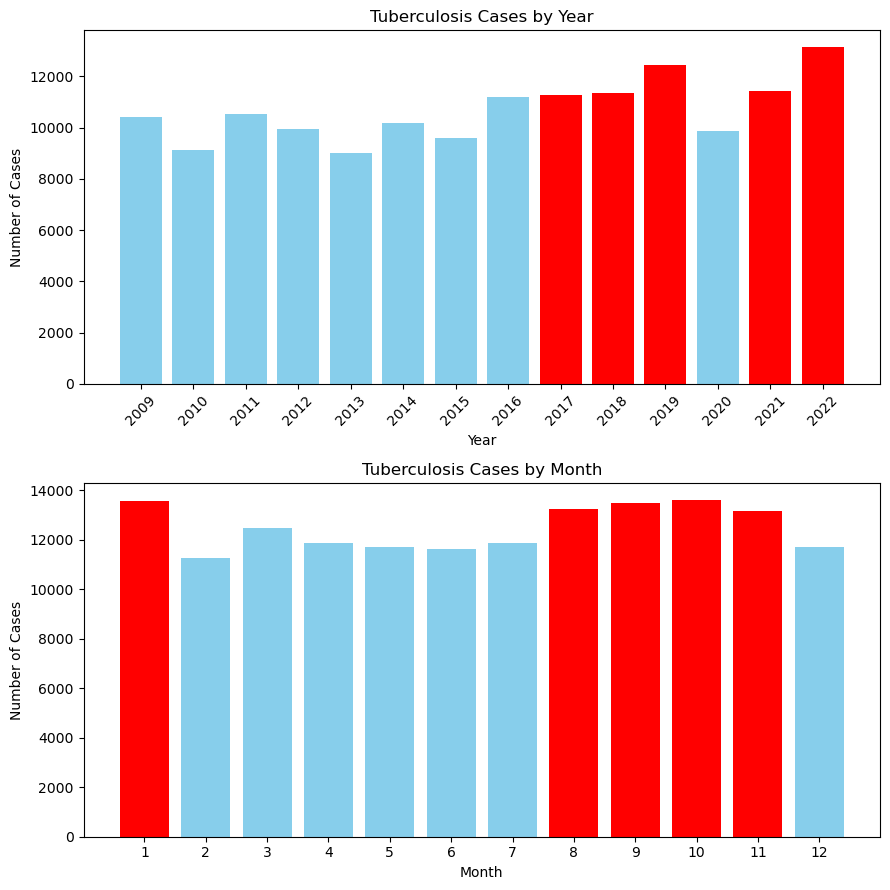

<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_f0 is your DataFrame and the following preprocessing has been done:
df_f0['fecha'] = pd.to_datetime(df_f0['fecha'])
df_f0['fnyear'] = df_f0['fecha'].dt.year
df_f0['fnmonth'] = df_f0['fecha'].dt.month

# Filter out the years 2009 and 2022
df_filtered = df_f0[(df_f0['fnyear'] != 2006) & (df_f0['fnyear'] != 2023)]

# Group by year and count cases
cases_by_year = df_filtered.groupby('fnyear').size()

# Get the top 5 years with the highest number of cases
top_5_years = cases_by_year.nlargest(5)

# Group by month and count cases
cases_by_month = df_filtered.groupby('fnmonth').size()

# Get the top 5 months with the highest number of cases
top_5_months = cases_by_month.nlargest(5)

# Create subplot with 1 row and 2 columns
fig, ax = plt.subplots(2, 1, figsize=(9, 9))  # Adjust size as needed

# Plot cases by year on the first subplot
ax[0].bar(cases_by_year.index, cases_by_year.values, color=['red' if year in top_5_years.index else 'skyblue' for year in cases_by_year.index])
ax[0].set_title('Tuberculosis Cases by Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Cases')
ax[0].set_xticks(cases_by_year.index)
ax[0].set_xticklabels(cases_by_year.index, rotation=45)

# Plot cases by month on the second subplot
colors_month = ['red' if month in top_5_months.index else 'skyblue' for month in cases_by_month.index]
ax[1].bar(cases_by_month.index, cases_by_month.values, color=colors_month)
ax[1].set_title('Tuberculosis Cases by Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Number of Cases')
ax[1].set_xticks(cases_by_month.index)
ax[1].set_xticklabels(cases_by_month.index, rotation=0)

plt.tight_layout()
plt.show()
plt.savefig('Documentacion\\figures\\cases_month_year.png', dpi=300)  # Higher resolution


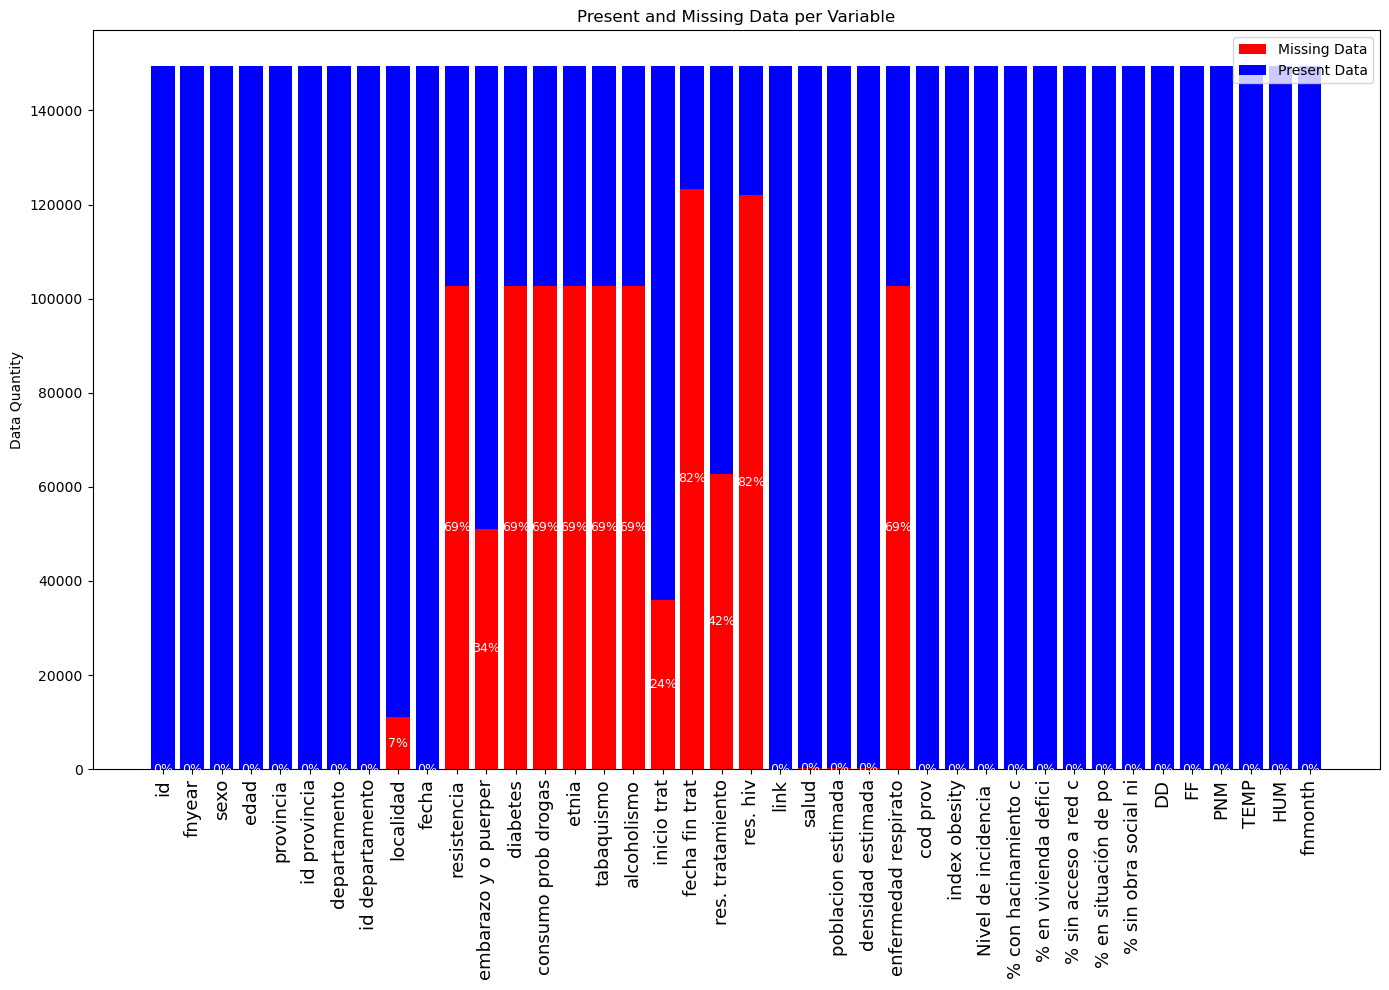

In [4]:



df_f_0_f = df_f0.copy()
df_f_0_f.replace('Sin Información', np.nan, inplace=True)

l_columns=df_f_0_f.columns
l_predictos2=[]
for s in l_columns:
    

    l_predictos2.append(s.replace("_"," ").replace(" crónica","").replace(" de hogares","").replace(" de población","").replace("resultado","res.")[:20])




df_f_0_f.columns=l_predictos2
# Create DataFrame for missing data
df_missing = pd.DataFrame(df_f_0_f.isnull().sum(), columns=["Missing Data #"])
df_missing["% Missing"] = round(df_missing["Missing Data #"] / len(df_f_0_f) * 100, 2)

# Create bar chart
fig, ax = plt.subplots(figsize=(14, 10))  # Adjust chart size

# Get variables and values
variables = df_missing.index
values = df_missing["Missing Data #"]
percentages = df_missing["% Missing"]

# Blue bars for present data
blue_bar = ax.bar(variables, values, color='red', label='Missing Data')

# Red bars for missing data
red_bar = ax.bar(variables, len(df_f_0_f) - values, bottom=values, color='blue', label='Present Data')

# Percentage labels for missing data
for i, (percentage, value) in enumerate(zip(percentages, values)):
    ax.text(i, value / 2, f"{percentage:.0f}%", ha='center', va='center', color='white', fontsize=9)  # Change color to white

# Chart configuration
ax.set_ylabel('Data Quantity')
ax.set_title('Present and Missing Data per Variable')
ax.legend()

# Display chart
plt.xticks(rotation=90, fontsize=13)  # Ajusta el tamaño aquí

plt.tight_layout()
plt.savefig('Documentacion\\figures\\missing_data_chart.png', dpi=300)  # Higher resolution
plt.show()



In [5]:

min_fecha=pd.to_datetime(df_f['fecha']).min()

df_f['NUMERO_SEMANA'] = ((pd.to_datetime(df_f['fecha']) - min_fecha).dt.days // 7) + 1



In [6]:



df_aux2=df_f.copy()
df_aux2=pd.pivot_table(df_aux2,index=["provincia","NUMERO_SEMANA"],values=["fecha"],aggfunc="count")

df_aux3=pd.DataFrame(df_aux2.to_records())

df_aux3.columns=["provincia","NUMERO_SEMANA","CANTIDAD_CASOS"]




df_aux3=df_aux3.loc[df_aux3["provincia"]!="Desconocida"]




In [7]:
df_aux2=pd.merge(df_aux3,df_f[["provincia","poblacion_estimada"]].drop_duplicates(),on="provincia",how="left").drop_duplicates(subset=["provincia","NUMERO_SEMANA"],keep="first")


In [8]:



df_aux2["N_CASOS_HAB"]=df_aux2["CANTIDAD_CASOS"]/df_aux2["poblacion_estimada"]

df_aux2["N_CASOS_HAB_SUAV"] = df_aux2.groupby('provincia')["N_CASOS_HAB"].rolling(window=52, min_periods=1).mean().reset_index(0, drop=True)


df_aux3.head()

,provincia,NUMERO_SEMANA,CANTIDAD_CASOS
0,Buenos Aires,1,132
1,Buenos Aires,2,54
2,Buenos Aires,3,194
3,Buenos Aires,4,47
4,Buenos Aires,5,123


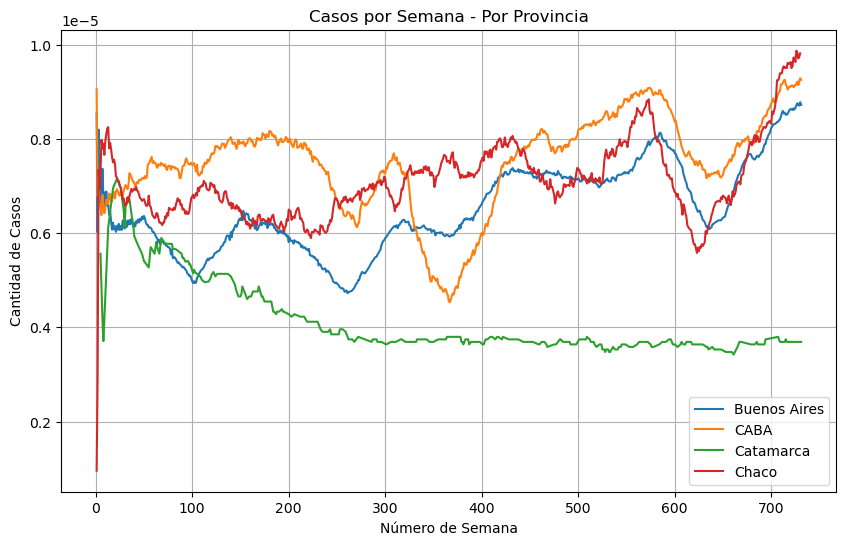

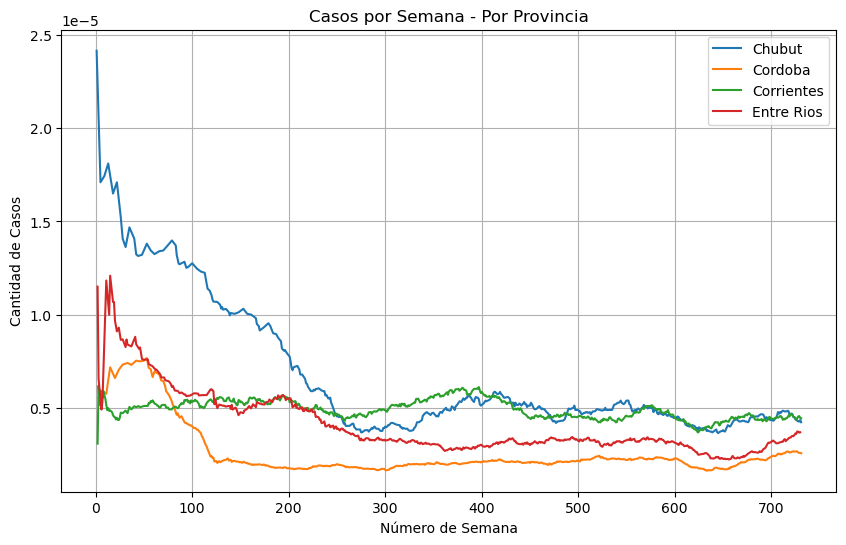

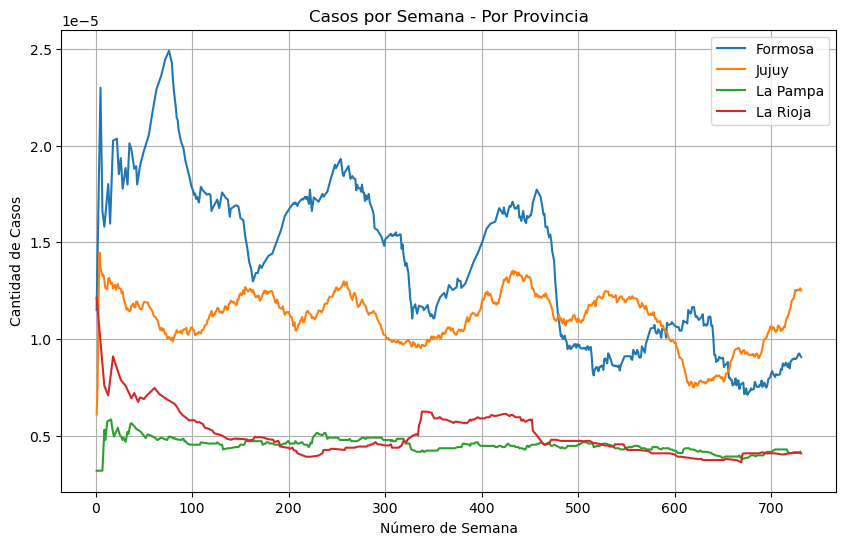

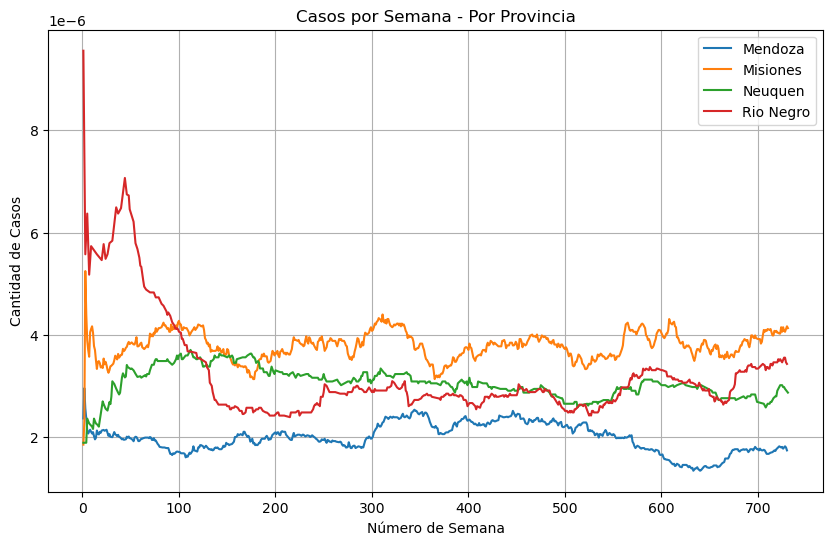

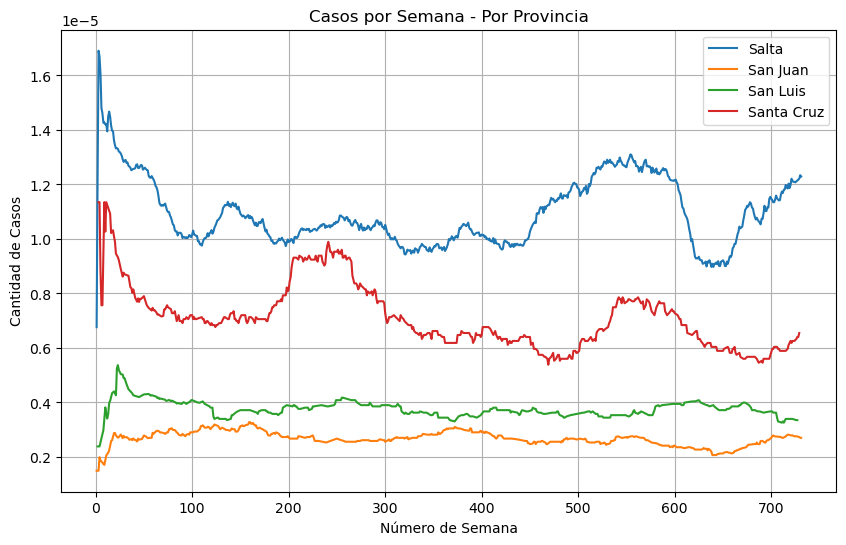

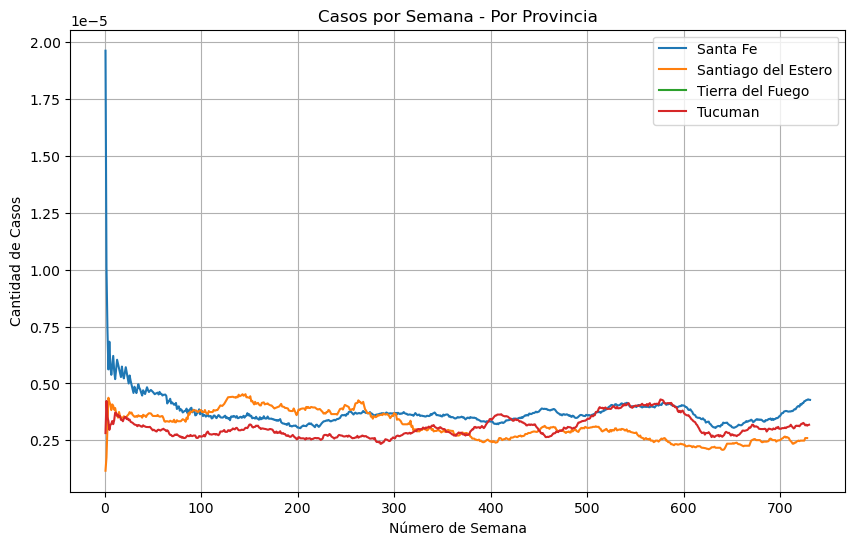

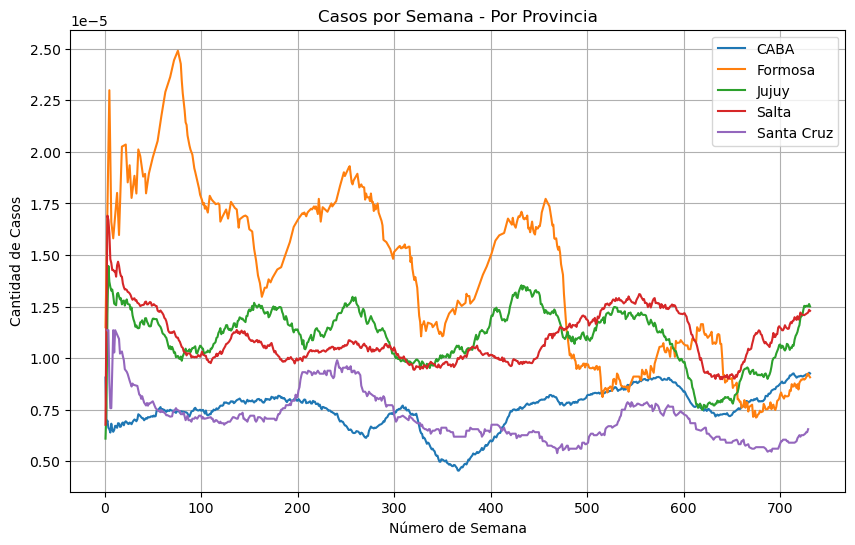

In [15]:



# df_aux3.columns=["Provincia","NUMERO_SEMANA","CANTIDAD_CASOS"]
# df_aux3=df_aux3.loc[df_aux3["Provincia"]!="Desconocida"]

# df_aux2=pd.merge(df_aux3,df_aux[["Provincia","Poblacion_Estimada"]].drop_duplicates(),on="Provincia",how="left").drop_duplicates(subset=["Provincia","NUMERO_SEMANA"],keep="first")



# df_aux2["N_CASOS_HAB"]=df_aux2["CANTIDAD_CASOS"]/df_aux2["Poblacion_Estimada"]

# df_aux2["N_CASOS_HAB_SUAV"] = df_aux2.groupby('Provincia')["N_CASOS_HAB"].rolling(window=52, min_periods=1).mean().reset_index(0, drop=True)




# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'NUMERO_SEMANA', 'CANTIDAD_CASOS' y 'PROVINCIA'
# Asegúrate de haber calculado 'NUMERO_SEMANA' como se mostró en la respuesta anterior

# Ejemplo de DataFrame


# Crear un gráfico de línea para cada provincia

def plotear_provincia(df_aux2):
    plt.figure(figsize=(10, 6))

    provincias = df_aux2['provincia'].unique()
    for provincia in provincias:
        provincia_df = df_aux2[ df_aux2['provincia'] == provincia]
        plt.plot(provincia_df['NUMERO_SEMANA'], provincia_df[["N_CASOS_HAB_SUAV"]], label=provincia)

    plt.xlabel('Número de Semana')
    plt.ylabel('Cantidad de Casos')
    plt.title('Casos por Semana - Por Provincia')
    plt.legend()
    plt.grid(True)
    plt.show()

l_provincias=list(df_aux2['provincia'].unique())
i=0
while i <len(l_provincias):
    lista=(l_provincias[i:i+4])
    i=i+4
    df_aux3=df_aux2.loc[df_aux2['provincia'].isin(lista)]
    plotear_provincia(df_aux3)
#df_aux3=df_aux2.loc[df_aux2['PROVINCIA'].isin(lista)]


promedio_suavizado_por_provincia = df_aux2.groupby('provincia')["N_CASOS_HAB_SUAV"].mean()

top_10_provincias = promedio_suavizado_por_provincia.nlargest(5).index

# Filtrar el DataFrame original para incluir solo las provincias del top 10

df_aux3=df_aux2.loc[df_aux2['provincia'].isin(top_10_provincias )]
df_top_10 = df_aux2[df_aux2['provincia'].isin(top_10_provincias)]
plotear_provincia(df_top_10)

In [ ]:


import geopandas as gpd
from utils import utils
ruta_archivo_shp = 'Bases\\\Vecindad\\Codgeo_Pais_x_dpto_con_datos\\pxdptodatosok.shp'

# Abre el archivo SHP usando geopandas
dataframe_shp = gpd.read_file(ruta_archivo_shp)
df_sexo=pd.DataFrame(pd.pivot_table(df_f,index=["provincia","departamento"],columns=["sexo"],aggfunc="size").to_records())

df_sexo.columns=["provincia","departamen","F","M"]
dataframe_shp2=dataframe_shp[["departamen","provincia","mujeres","varones"]]
df_sexo_total=pd.merge(dataframe_shp2,df_sexo,on=["provincia","departamen"],how="left")
df_sexo_total=df_sexo_total.fillna(0)


df_sexo_total["mujeres"]=df_sexo_total["mujeres"].astype(int)
df_sexo_total["varones"]=df_sexo_total["varones"].astype(int)




suma_por_columna = df_sexo_total.iloc[:, 2:].sum()

# Crear una nueva fila con la suma y excluir las columnas 'provincia' y 'departamento'
nueva_fila = {'provincia': 'Total', 'departamento': 'Total'}
for columna, suma in suma_por_columna.items():
    nueva_fila[columna] = suma

# Agregar la nueva fila al final del DataFrame
    
nueva_fila_df=pd.DataFrame([nueva_fila])

df_sexo_total2=pd.concat([df_sexo_total, nueva_fila_df], ignore_index=True)
df_sexo_total2["% varones"]=df_sexo_total2["varones"]/(df_sexo_total2["mujeres"]+df_sexo_total2["varones"])


df_sexo_total2["% M"]=df_sexo_total2["M"]/(df_sexo_total2["F"]+df_sexo_total2["M"])
df_sexo_prov=df_sexo_total2.loc[df_sexo_total2["provincia"]=="Caba"]
df_sexo_prov=df_sexo_total2.loc[~df_sexo_total2["provincia"].isnull()]

In [ ]:

import numpy as np
from scipy.stats import norm

# Datos
total_mujeres=df_sexo_prov["mujeres"].sum()
total_hombres = df_sexo_prov["varones"].sum()
infectados_mujeres = df_sexo_prov["F"].sum()
infectados_hombres = df_sexo_prov["M"].sum()

# Calcular las proporciones de infectados
proporcion_infectados_mujeres = infectados_mujeres / total_mujeres
proporcion_infectados_hombres = infectados_hombres / total_hombres

# Calcular los errores estándar de las proporciones
se_mujeres = np.sqrt(proporcion_infectados_mujeres * (1 - proporcion_infectados_mujeres) / total_mujeres)
se_hombres = np.sqrt(proporcion_infectados_hombres * (1 - proporcion_infectados_hombres) / total_hombres)

# Calcular la diferencia de proporciones
diferencia_proporciones = proporcion_infectados_hombres - proporcion_infectados_mujeres

# Calcular el intervalo de confianza del 95% para la diferencia de proporciones
se_diferencia = np.sqrt(se_mujeres**2 + se_hombres**2)
z_score = norm.ppf(0.975)  # Z-score para un intervalo de confianza del 95%
intervalo_confianza = z_score * se_diferencia

# Realizar la prueba de hipótesis
p_valor = norm.cdf(-abs(diferencia_proporciones) / se_diferencia) * 2

# Imprimir resultados
print("Proporción de infectados en mujeres:", proporcion_infectados_mujeres)
print("Proporción de infectados en hombres:", proporcion_infectados_hombres)
print("Diferencia de proporciones:", diferencia_proporciones)
print("Error estándar de la diferencia:", se_diferencia)
print("Intervalo de confianza del 95%:", (-intervalo_confianza, intervalo_confianza))
print("Valor p:", p_valor)

# Interpretación del resultado
if p_valor < 0.05:
    print("La diferencia en las tasas de infección entre hombres y mujeres es estadísticamente significativa.")
else:
    print("No hay una diferencia significativa en las tasas de infección entre hombres y mujeres.")



Proporción de infectados en mujeres: 0.0005965523788527645
Proporción de infectados en hombres: 0.0008229969566322399
Diferencia de proporciones: 0.00022644457777947543
Error estándar de la diferencia: 5.961118021852662e-06
Intervalo de confianza del 95%: (-1.1683576630423868e-05, 1.1683576630423868e-05)
Valor p: 0.0
La diferencia en las tasas de infección entre hombres y mujeres es estadísticamente significativa.


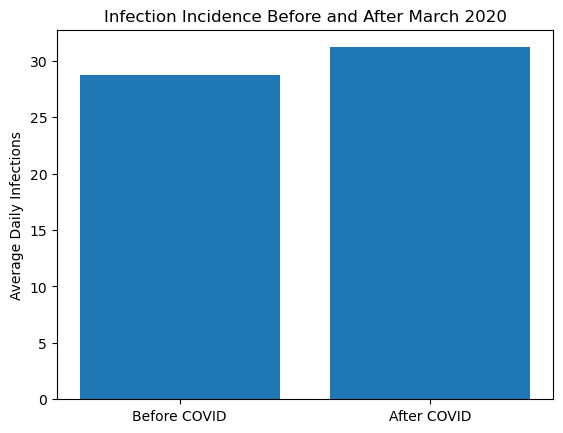

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_f["fecha"] = pd.to_datetime(df_f["fecha"])

# Group infections by date and calculate the total number of infections for each date
conteo_infecciones = df_f.groupby("fecha").size()
rango_fechas = pd.date_range(start=conteo_infecciones.index.min(), end=conteo_infecciones.index.max(), freq='D')

# Create a DataFrame with the date range as index and the count of infections
datos_infecciones = pd.DataFrame({"fecha": conteo_infecciones}, index=rango_fechas)
datos_infecciones.fillna(0, inplace=True)
datos_infecciones.rename(columns={"fecha": 'infecciones'}, inplace=True)

# Split data into before and after March 2020
datos_antes_covid = datos_infecciones.loc[datos_infecciones.index < '2020-03-01']
datos_despues_covid = datos_infecciones.loc[datos_infecciones.index >= '2020-03-01']

# Calculate the average daily incidence of infections before and after March 2020
incidencia_antes_covid = datos_antes_covid['infecciones'].sum() / len(datos_antes_covid)
incidencia_despues_covid = datos_despues_covid['infecciones'].sum() / len(datos_despues_covid)

# Plotting
plt.bar(['Before COVID', 'After COVID'], [incidencia_antes_covid, incidencia_despues_covid])
plt.ylabel('Average Daily Infections')
plt.title('Infection Incidence Before and After March 2020')
plt.show()


In [ ]:
len(datos_antes_covid)

4077